In [33]:
from sklearn.model_selection import train_test_split
import pandas
data = pandas.read_csv( "gbm-data.csv" )
X = data.select( lambda x: x != "Activity" , axis=1 ).as_matrix()
Y = data.select( lambda x: x == "Activity" , axis=1 ).as_matrix().ravel()

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=241)

In [35]:
from sklearn.svm.libsvm import predict_proba
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [42]:
lrates =  [1, 0.5, 0.3, 0.2, 0.1]
import math
import numpy
def transform( y ):
    return 1.0 / ( 1.0 + numpy.exp( -y ) )
err = {}
for rate in lrates:
    err[ rate ] = []
    gbc = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate =rate)
    gbc.fit( X_train , Y_train )
    min_i = -1
    min_loss = 0xffffff
    for i, Y_pred in enumerate(gbc.staged_decision_function(X_test)):
        Y_pred = transform( Y_pred )
        loss = log_loss( Y_test , Y_pred )
        err[ rate ].append( loss )
        if loss < min_loss:
            min_loss = loss
            min_i = i
    print rate , min_i , min_loss

1 0 0.582294259428
0.5 6 0.558202552316
0.3 10 0.542314111002
0.2 36 0.531450796319
0.1 51 0.526920187228


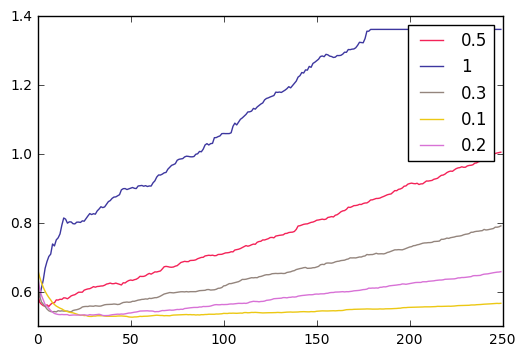

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
for rate in err:
    plt.plot(err[ rate ], 'r', linewidth=1,c=numpy.random.rand(3,1))
plt.legend(err.keys())

In [55]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
clf = RandomForestClassifier(n_estimators=51  ,random_state=241)
clf.fit(X_train, Y_train)
Y_pred = clf.predict_proba(X_test)
print log_loss( Y_test , Y_pred )

0.538873466003
